### Importing Libraries and Loading Data

In [478]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action='ignore')



In [479]:
data = pd.read_csv('chronic_kidney_disease.csv')


In [480]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [481]:
data.describe()


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


Correcting various typos and formatting issues in the dataset. It replaces misplaced tabs and extra spaces in specific columns, converts certain entries to NaN where appropriate, and ensures consistent naming conventions for the target variable.

In [482]:
for i in range(data.shape[0]):
    if data.iloc[i,24]=='ckd\t':
        data.iloc[i,24]='ckd'
    if data.iloc[i,19] in [' yes','\tyes']:
        data.iloc[i,19]='yes'
    if data.iloc[i,19]=='\tno':
        data.iloc[i,19]='no'
    if data.iloc[i,20]=='\tno':
        data.iloc[i,20]='no'
    if data.iloc[i,15]=='\t?':
        data.iloc[i,15]=np.nan
    if data.iloc[i,15]=='\t43':
        data.iloc[i,15]='43'
    if data.iloc[i,16]=='\t?':
        data.iloc[i,16]=np.nan
    if data.iloc[i,16]=='\t6200':
        data.iloc[i,16]= '6200'
    if data.iloc[i,16]=='\t8400':
        data.iloc[i,16]= '6200'
    if data.iloc[i,17]=='\t?':
        data.iloc[i,17]=np.nan
    if data.iloc[i,24]=='ckd':
        data.iloc[i,24]='yes'
    if data.iloc[i,24]=='notckd':
        data.iloc[i,24]='no'

In [483]:
feature_names=['Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']
data.columns=feature_names

In [484]:
for i in data.columns:
    print("unique values in {}:\n".format(i),data[i].unique())

unique values in Age (yrs):
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in Blood Pressure (mm/Hg):
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in Specific Gravity:
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in Albumin:
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in Sugar:
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in Red Blood Cells:
 [nan 'normal' 'abnormal']
unique values in Pus Cells:
 ['normal' 'abnormal' nan]
unique values in Pus Cell Clumps:
 ['notpresent' 'present' nan]
unique values in Bacteria:
 ['notpresent' 'present' nan]
unique values in Blood Glucose Random (mgs/dL):
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99.

identifying columns that are mistyped as strings but should be numeric. These columns are converted to float type, and their unique values are printed to confirm the conversion.



In [485]:
mistyped=['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
numeric=[]
for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+mistyped

for col in mistyped:
        data[col]=data[col].astype('float')

In [486]:
print(data['Packed Cell Volume'].unique())
print(data['White Blood Cells (cells/cmm)'].unique())
print(data['Red Blood Cells (millions/cmm)'].unique())

[44. 38. 31. 32. 35. 39. 36. 33. 29. 28. nan 16. 24. 37. 30. 34. 40. 45.
 27. 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.]
[ 7800.  6000.  7500.  6700.  7300.    nan  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9800.  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.
  7200.  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200.
 12500.  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600.
 10200.  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.
  4700. 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700.
 11500.  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]
[5.2 nan 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5
 4.2 4.5 3.1 4.7 3.5 6.  2.1 5.6 2.3 2.9 2.7 8.  3.3 3.  2.4 4.8 5.4 6.1
 6.2 6.3 5.1 5.8 5.5 5.3 6.4 5.7 5.9 6

In [487]:
data.isna().sum().sort_values(ascending = False)


Red Blood Cells                   152
Red Blood Cells (millions/cmm)    131
White Blood Cells (cells/cmm)     106
Potassium (mEq/L)                  88
Sodium (mEq/L)                     87
Packed Cell Volume                 71
Pus Cells                          65
Hemoglobin (gms)                   52
Sugar                              49
Specific Gravity                   47
Albumin                            46
Blood Glucose Random (mgs/dL)      44
Blood Urea (mgs/dL)                19
Serum Creatinine (mgs/dL)          17
Blood Pressure (mm/Hg)             12
Age (yrs)                           9
Pus Cell Clumps                     4
Bacteria                            4
Hypertension                        2
Diabetes Mellitus                   2
Coronary Artery Disease             2
Appetite                            1
Pedal Edema                         1
Anemia                              1
Chronic Kidney Disease              0
dtype: int64

In [488]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
num_cols = [col for col in data.columns if data[col].dtype != 'object']
data[num_cols].isnull().sum()


Age (yrs)                           9
Blood Pressure (mm/Hg)             12
Specific Gravity                   47
Albumin                            46
Sugar                              49
Blood Glucose Random (mgs/dL)      44
Blood Urea (mgs/dL)                19
Serum Creatinine (mgs/dL)          17
Sodium (mEq/L)                     87
Potassium (mEq/L)                  88
Hemoglobin (gms)                   52
Packed Cell Volume                 71
White Blood Cells (cells/cmm)     106
Red Blood Cells (millions/cmm)    131
dtype: int64

In [489]:
data[cat_cols].isnull().sum()


Red Blood Cells            152
Pus Cells                   65
Pus Cell Clumps              4
Bacteria                     4
Hypertension                 2
Diabetes Mellitus            2
Coronary Artery Disease      2
Appetite                     1
Pedal Edema                  1
Anemia                       1
Chronic Kidney Disease       0
dtype: int64

In [490]:
def random_value_imputation(feature):
    random_sample = data[feature].dropna().sample(data[feature].isna().sum())
    random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = data[feature].mode()[0]
    data[feature] = data[feature].fillna(mode)


for col in num_cols:
    random_value_imputation(col)

In [491]:
data[num_cols].isnull().sum()


Age (yrs)                         0
Blood Pressure (mm/Hg)            0
Specific Gravity                  0
Albumin                           0
Sugar                             0
Blood Glucose Random (mgs/dL)     0
Blood Urea (mgs/dL)               0
Serum Creatinine (mgs/dL)         0
Sodium (mEq/L)                    0
Potassium (mEq/L)                 0
Hemoglobin (gms)                  0
Packed Cell Volume                0
White Blood Cells (cells/cmm)     0
Red Blood Cells (millions/cmm)    0
dtype: int64

In [492]:
random_value_imputation('Red Blood Cells')
random_value_imputation('Pus Cells')

for col in cat_cols:
    impute_mode(col)

### Feature encoding

In [493]:
for col in cat_cols:
    print(f"{col} has {data[col].nunique()} categories")

Red Blood Cells has 2 categories
Pus Cells has 2 categories
Pus Cell Clumps has 2 categories
Bacteria has 2 categories
Hypertension has 2 categories
Diabetes Mellitus has 2 categories
Coronary Artery Disease has 2 categories
Appetite has 2 categories
Pedal Edema has 2 categories
Anemia has 2 categories
Chronic Kidney Disease has 2 categories


Encoding categorical features using LabelEncoder to convert them into numeric format, which is required for most machine learning algorithms.

In [494]:
le = LabelEncoder()

for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [495]:
data.head()


,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,109.0,...,38.0,6000.0,5.2,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.9,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1


In [496]:
ind_col = [col for col in data.columns if col != 'Chronic Kidney Disease']
dep_col = 'Chronic Kidney Disease'

X = data[ind_col]
y = data[dep_col]

### Standard Scaling and feature importance

Using a RandomForestClassifier to determine the importance of each feature in predicting chronic kidney disease. The top 10 most important features are identified and printed.

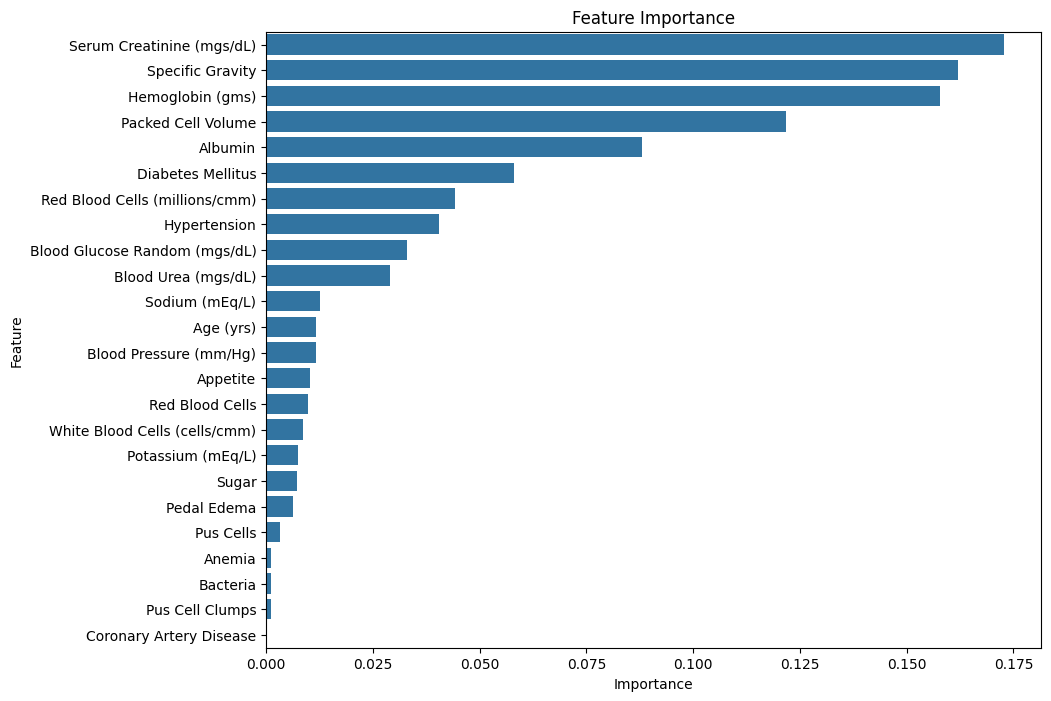

In [497]:
def plot_feature_importance(X, y):
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X, y)
    
    importances = rf_classifier.feature_importances_
    feature_names = X.columns
    
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.show()

    return feature_importance_df

feature_importance_df = plot_feature_importance(X, y)

In [498]:
most_important_features = feature_importance_df['Feature'][:10].tolist()
print("Most important features:", most_important_features)

Most important features: ['Serum Creatinine (mgs/dL)', 'Specific Gravity', 'Hemoglobin (gms)', 'Packed Cell Volume', 'Albumin', 'Diabetes Mellitus', 'Red Blood Cells (millions/cmm)', 'Hypertension', 'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)']


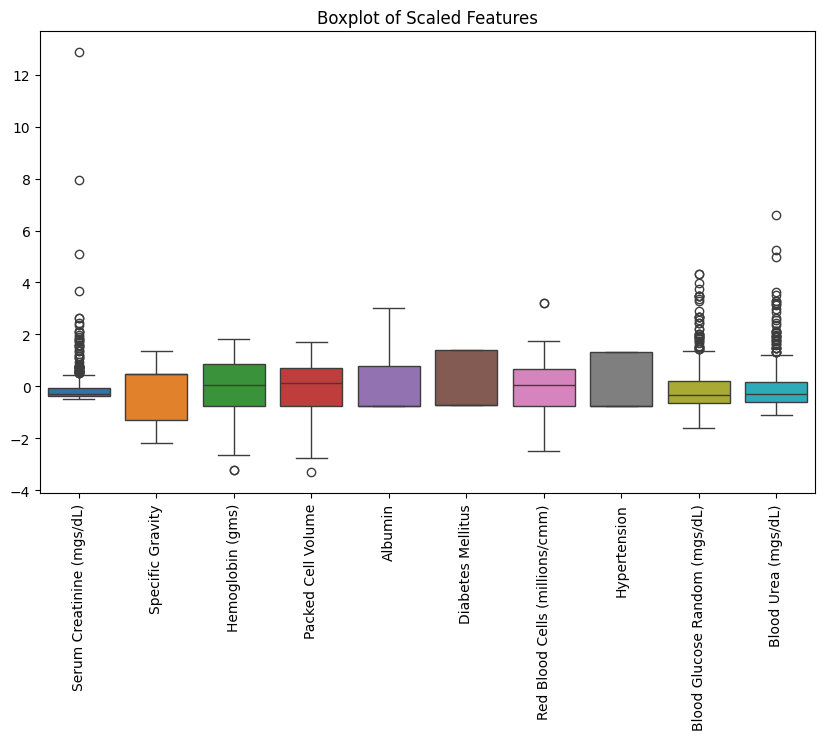

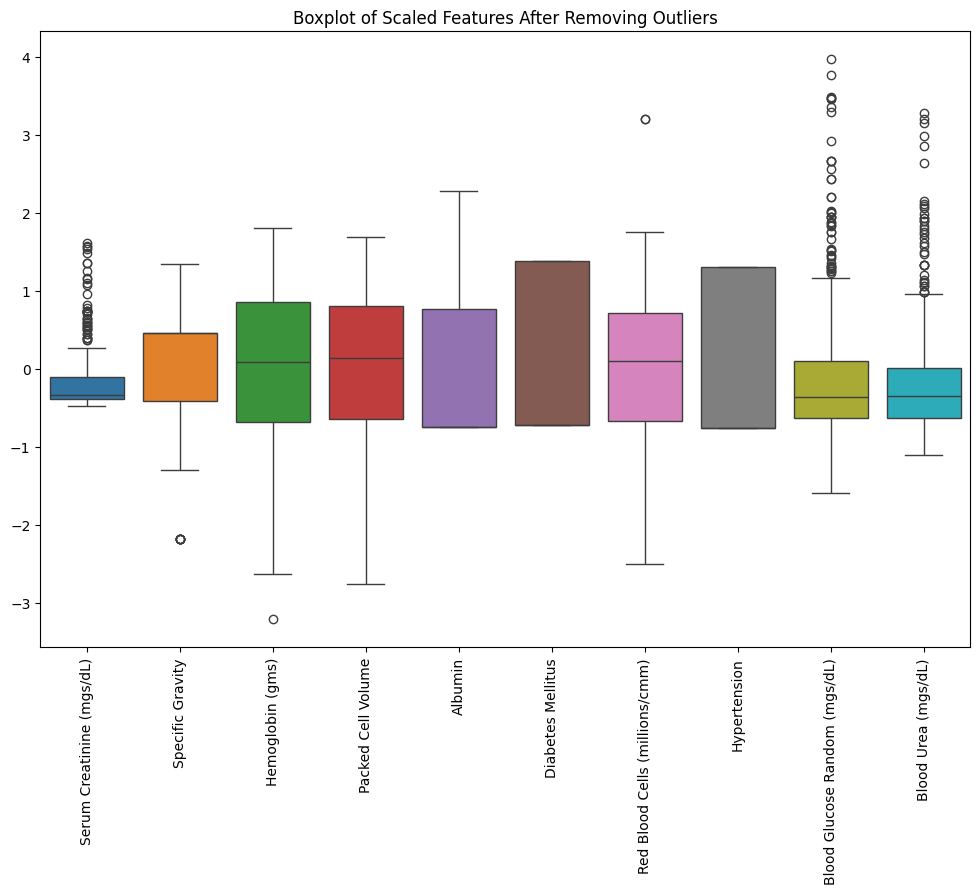

In [499]:
X_important = data[most_important_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_important)

X_scaled_df = pd.DataFrame(X_scaled, columns=most_important_features)

plt.figure(figsize=(10, 6))
sns.boxplot(data=X_scaled_df)
plt.xticks(rotation=90)
plt.title("Boxplot of Scaled Features")
plt.show()

Q1 = X_scaled_df.quantile(0.25)
Q3 = X_scaled_df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold multiplier for outliers
threshold = 5

# Remove outliers
filtered_df = X_scaled_df[~((X_scaled_df < (Q1 - threshold * IQR)) | (X_scaled_df > (Q3 + threshold * IQR))).any(axis=1)]

# Plot the boxplot with feature names after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df)
plt.xticks(rotation=90)
plt.title("Boxplot of Scaled Features After Removing Outliers")
plt.show()

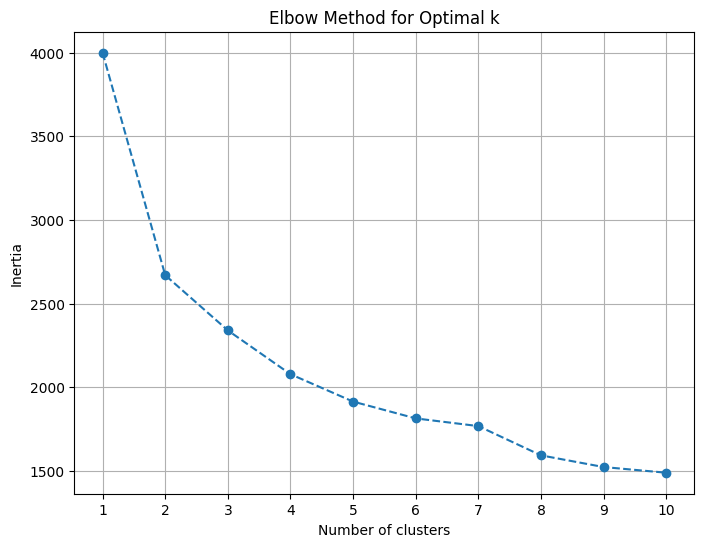

In [500]:

def apply_kmeans_and_plot_elbow(X_scaled, max_clusters=10):
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='--')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.xticks(range(1, max_clusters + 1))
    plt.grid(True)
    plt.show()

apply_kmeans_and_plot_elbow(X_scaled, max_clusters=10)

Silhouette Score for KMeans: 0.28535184670865127
Silhouette Score for Agglomerative Clustering: 0.246658018026287
Silhouette Score for DBSCAN: 0.39284449258974796


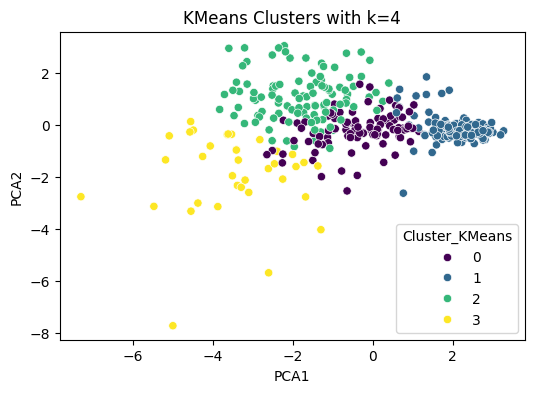

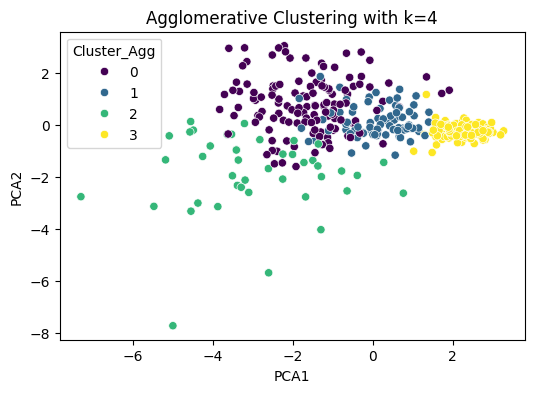

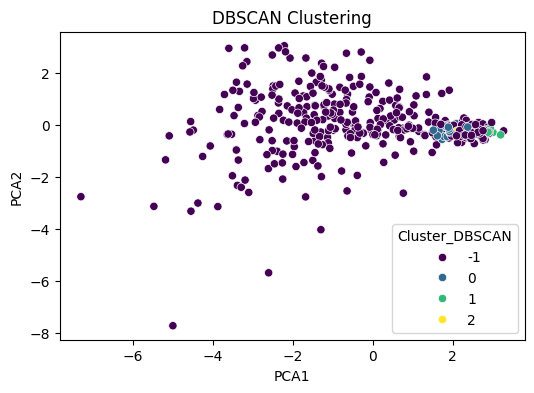

In [501]:
X_important = data[most_important_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_important)

kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

agg_clustering = AgglomerativeClustering(n_clusters=4)
data['Cluster_Agg'] = agg_clustering.fit_predict(X_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

kmeans_silhouette = silhouette_score(X_scaled, data['Cluster_KMeans'])
agg_silhouette = silhouette_score(X_scaled, data['Cluster_Agg'])

dbscan_labels = data['Cluster_DBSCAN']
dbscan_silhouette = silhouette_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])

print(f'Silhouette Score for KMeans: {kmeans_silhouette}')
print(f'Silhouette Score for Agglomerative Clustering: {agg_silhouette}')
print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(6, 4))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMeans', data=data, palette='viridis')
plt.title('KMeans Clusters with k=4')
plt.show()

data.drop(columns=['Cluster_KMeans'], inplace=True)

plt.figure(figsize=(6, 4))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Agg', data=data, palette='viridis')
plt.title('Agglomerative Clustering with k=4')
plt.show()

data.drop(columns=['Cluster_Agg'], inplace=True)

plt.figure(figsize=(6, 4))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_DBSCAN', data=data, palette='viridis', legend='full')
plt.title('DBSCAN Clustering')
plt.show()

data.drop(columns=['Cluster_DBSCAN'], inplace=True)


In [502]:
X_important = data[most_important_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_important)

kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)


In [503]:
data.drop(columns=['PCA1'], inplace=True)
data.drop(columns=['PCA2'], inplace=True)


In [504]:
data

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease,Cluster
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,7800.0,5.2,1,1,0,0,0,0,1,2
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,109.0,...,6000.0,5.2,0,0,0,0,0,0,1,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,7500.0,4.9,0,1,0,1,0,1,1,2
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,6700.0,3.9,1,0,0,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,7300.0,4.6,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,6700.0,4.9,0,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,7800.0,6.2,0,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,6600.0,5.4,0,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,7200.0,5.9,0,0,0,0,0,0,0,1


In [505]:

def generate_augmented_data(df, num_dpoints_per_type=100, noise_levels=None, non_integer_features=None, decimal_features=None, cluster_feature='cluster'):

    if noise_levels is None:
        noise_levels = 0.1
    if isinstance(noise_levels, float):
        noise_levels = {col: noise_levels for col in df.drop(columns=[cluster_feature]).columns}
    if non_integer_features is None:
        non_integer_features = []
    if decimal_features is None:
        decimal_features = {}
    
    cluster_means = df.groupby(cluster_feature).mean().reset_index()
    augmented_data = []
    
    for idx, row in cluster_means.iterrows():
        cluster_type = row[cluster_feature]
        cluster_mean_values = row.drop(cluster_feature)
        
        cluster_augmented_data = pd.DataFrame(columns=df.columns.drop([cluster_feature]))
        
        for feature in cluster_mean_values.index:
            noise = np.random.normal(0, noise_levels[feature], num_dpoints_per_type)
            max_value = df[feature].max() 
            min_value = df[feature].min() 
            augmented_feature_values = np.clip(cluster_mean_values[feature] + noise, min_value, max_value)
            
            if not feature in non_integer_features:
                augmented_feature_values = np.round(augmented_feature_values).astype(int)
            if feature in decimal_features:
                decimal_places = decimal_features[feature]
                augmented_feature_values = np.round(augmented_feature_values, decimals=decimal_places)
            cluster_augmented_data[feature] = augmented_feature_values
        
        cluster_augmented_data[cluster_feature] = cluster_type
        augmented_data.append(cluster_augmented_data)
    
    augmented_data_df = pd.concat(augmented_data, ignore_index=True)
    
    return augmented_data_df


In [506]:
augmented_data = generate_augmented_data(data, num_dpoints_per_type=100, noise_levels=0.8, non_integer_features=["Specific Gravity"], decimal_features={}, cluster_feature='Cluster')

print("Augmented Data:")
print(augmented_data.head())


Augmented Data:
   Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0         47                      79             1.005        2      0   
1         48                      78             1.005        2      1   
2         48                      77             1.005        2      0   
3         47                      77             1.025        3      0   
4         47                      78             1.005        1      0   

   Red Blood Cells  Pus Cells  Pus Cell Clumps  Bacteria  \
0                1          1                0         0   
1                1          1                1         0   
2                0          1                0         0   
3                0          1                0         0   
4                1          0                1         0   

   Blood Glucose Random (mgs/dL)  ...  White Blood Cells (cells/cmm)  \
0                            126  ...                           8553   
1                            128  

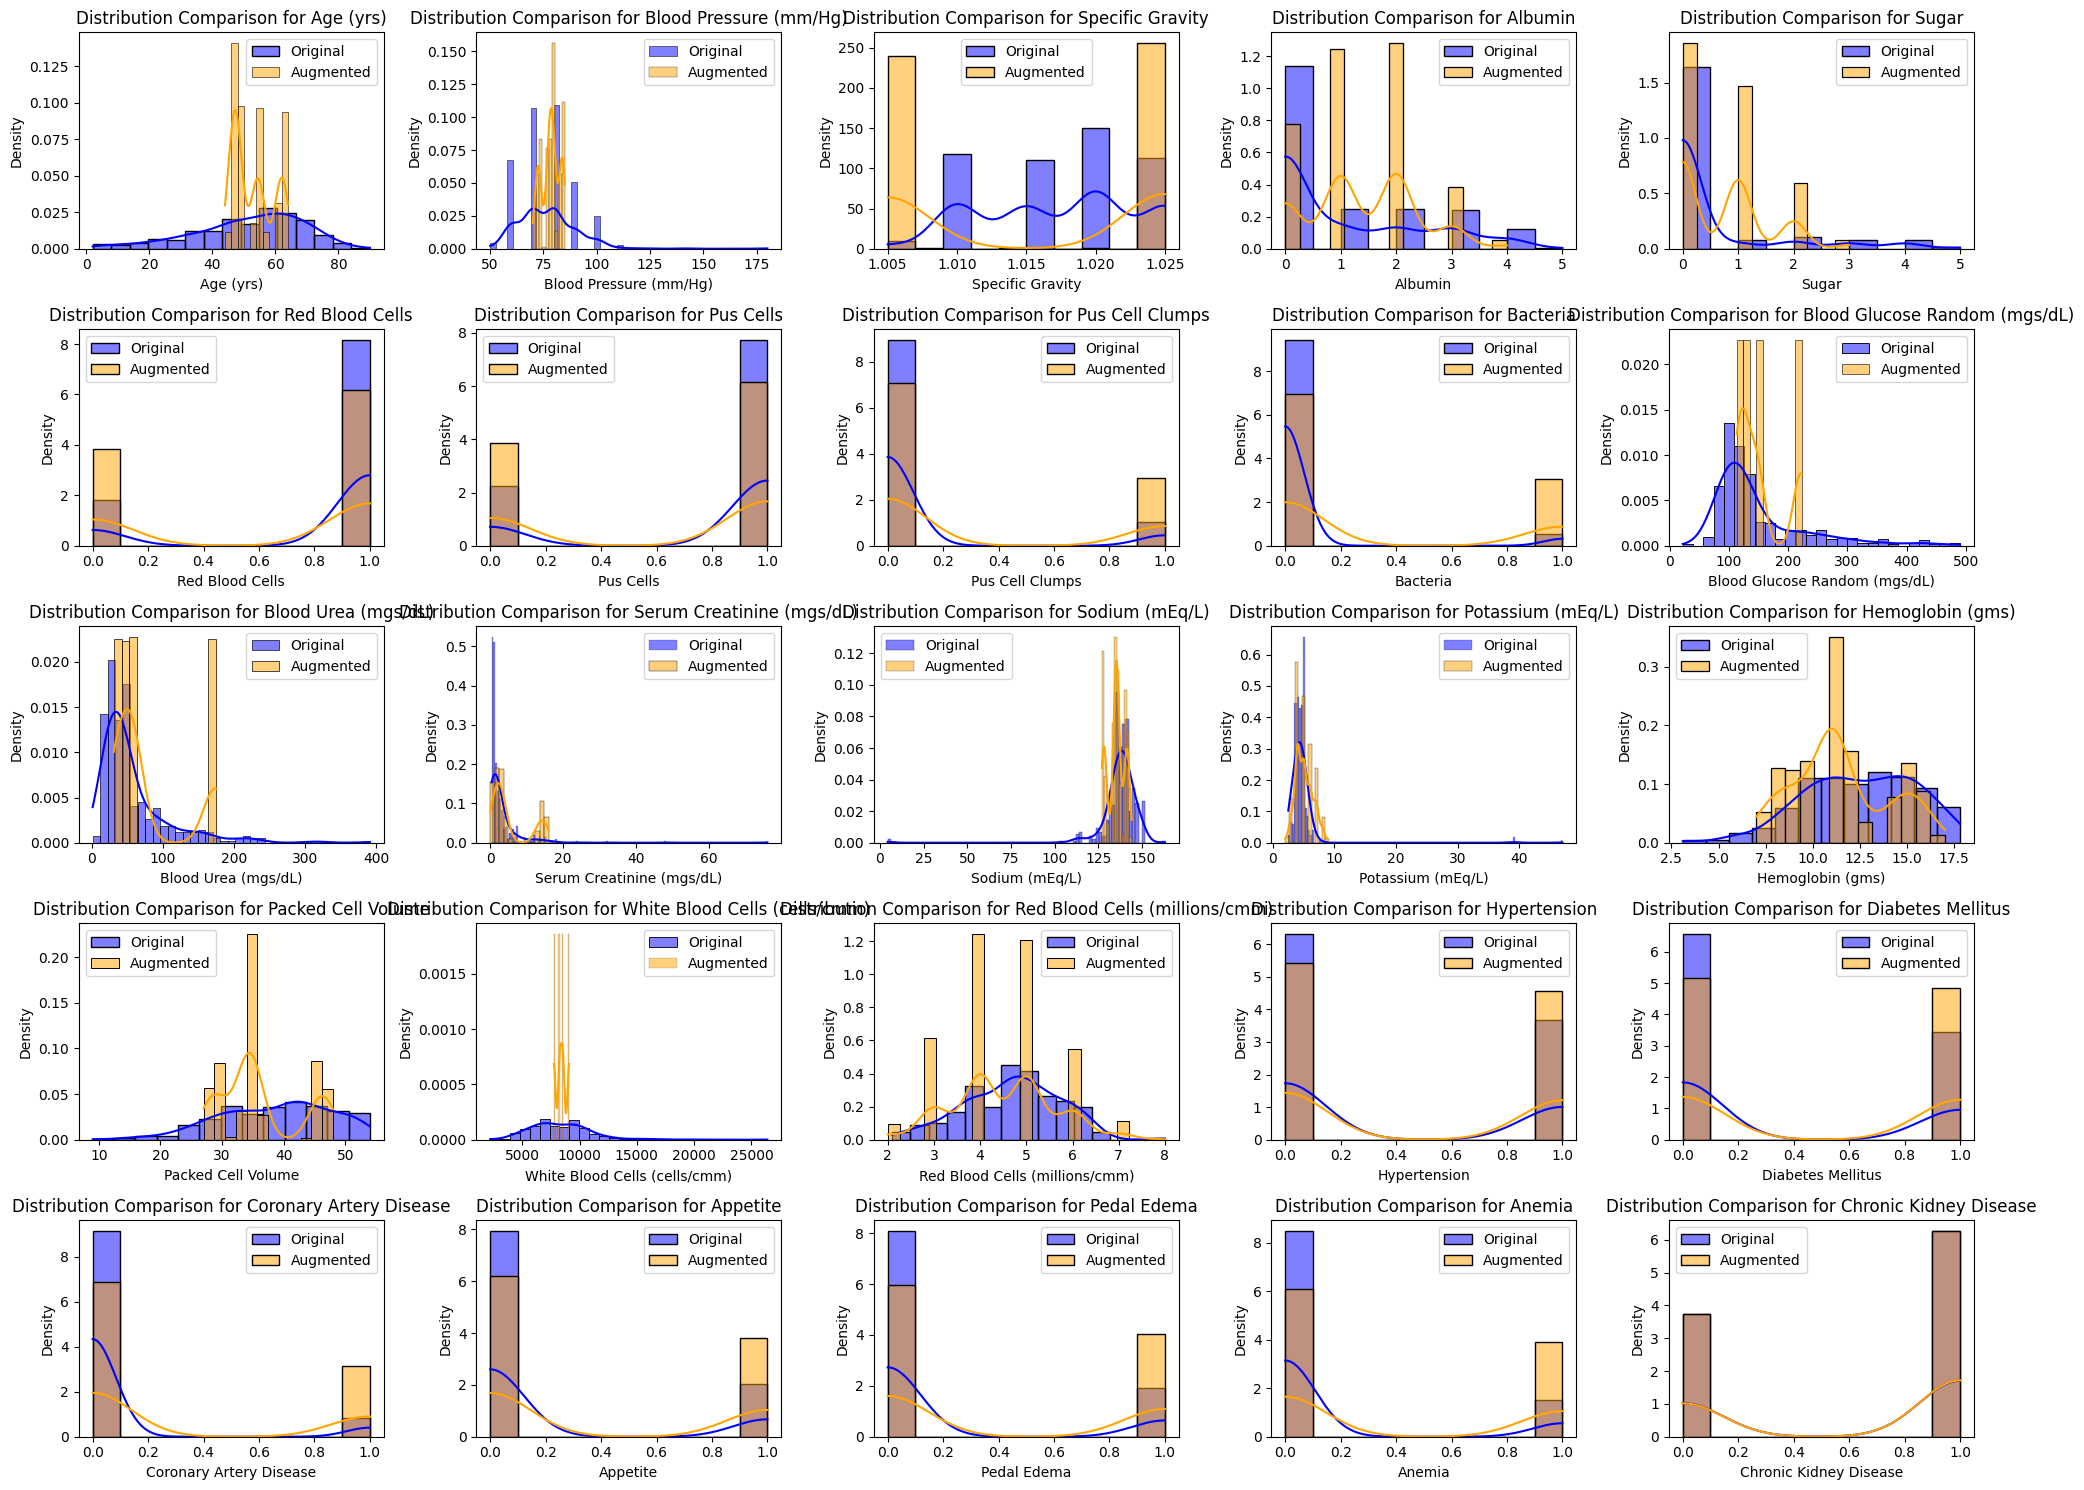

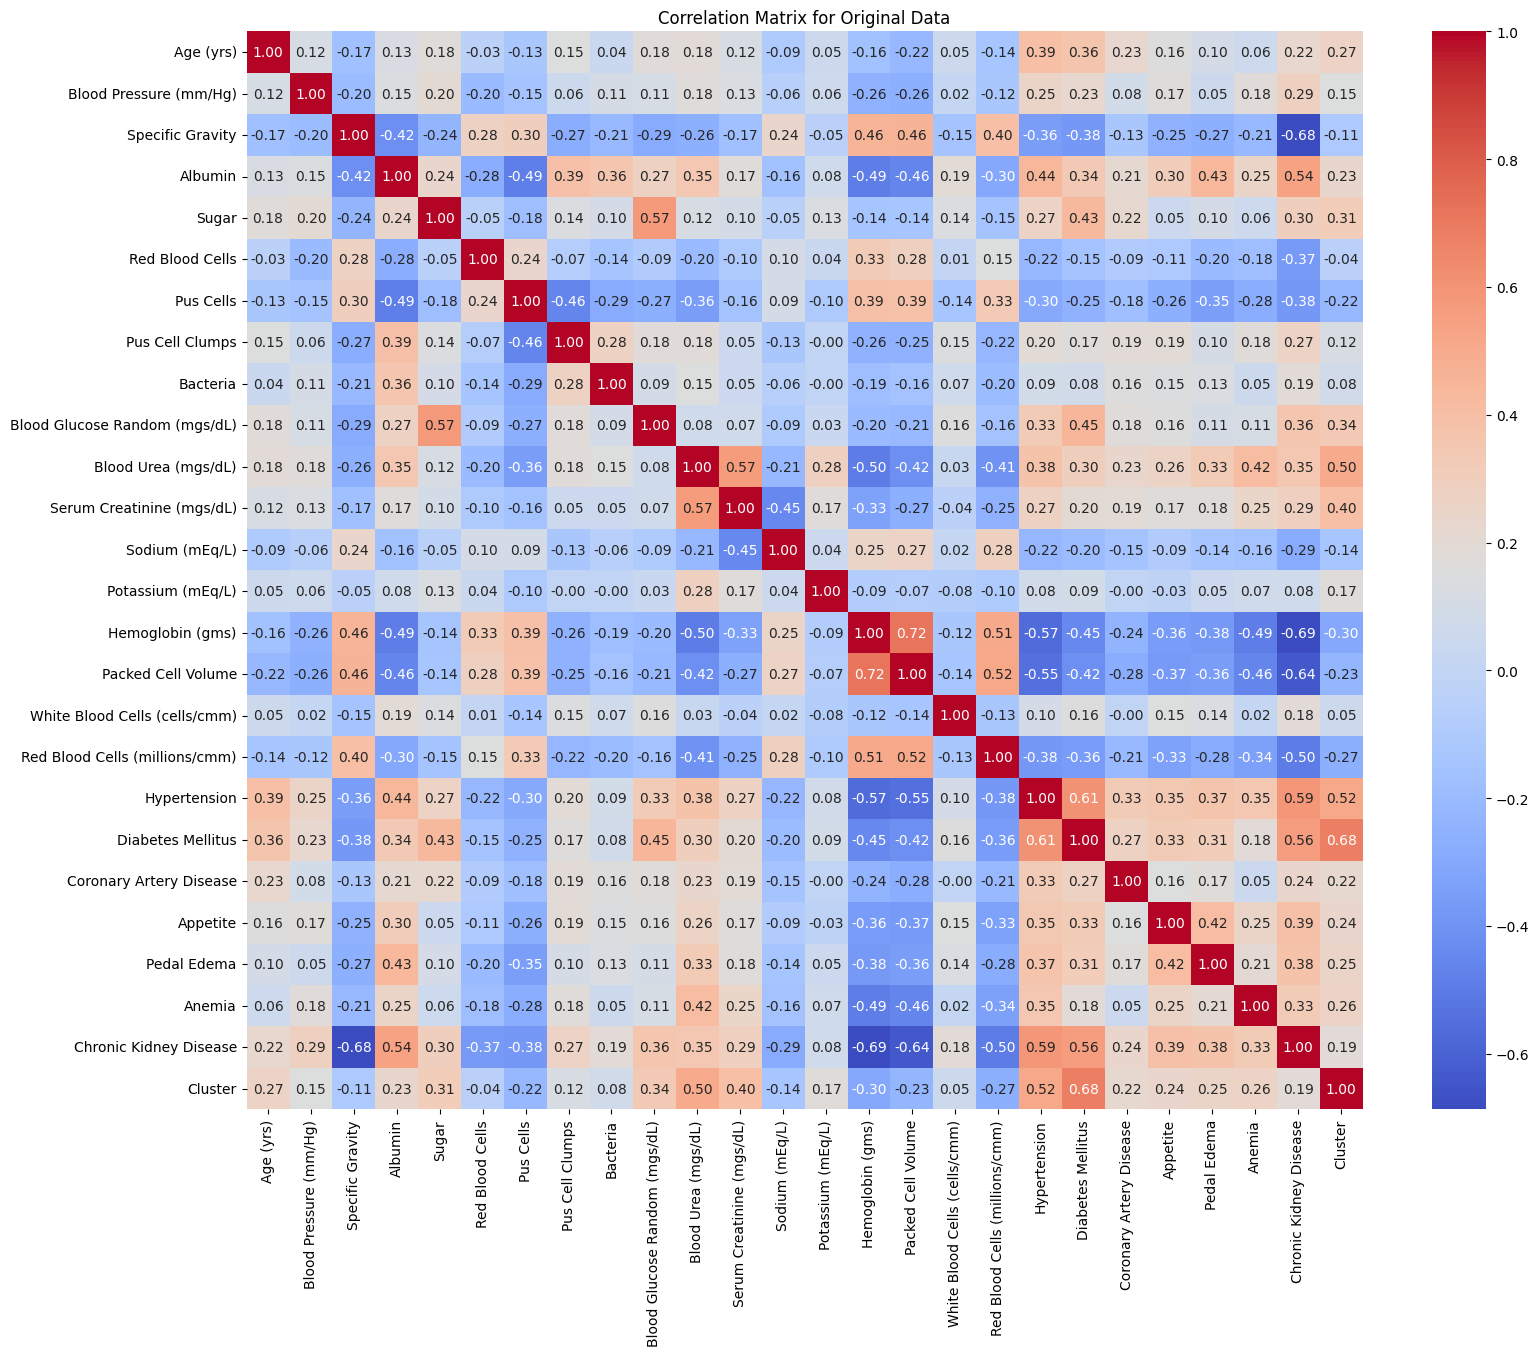

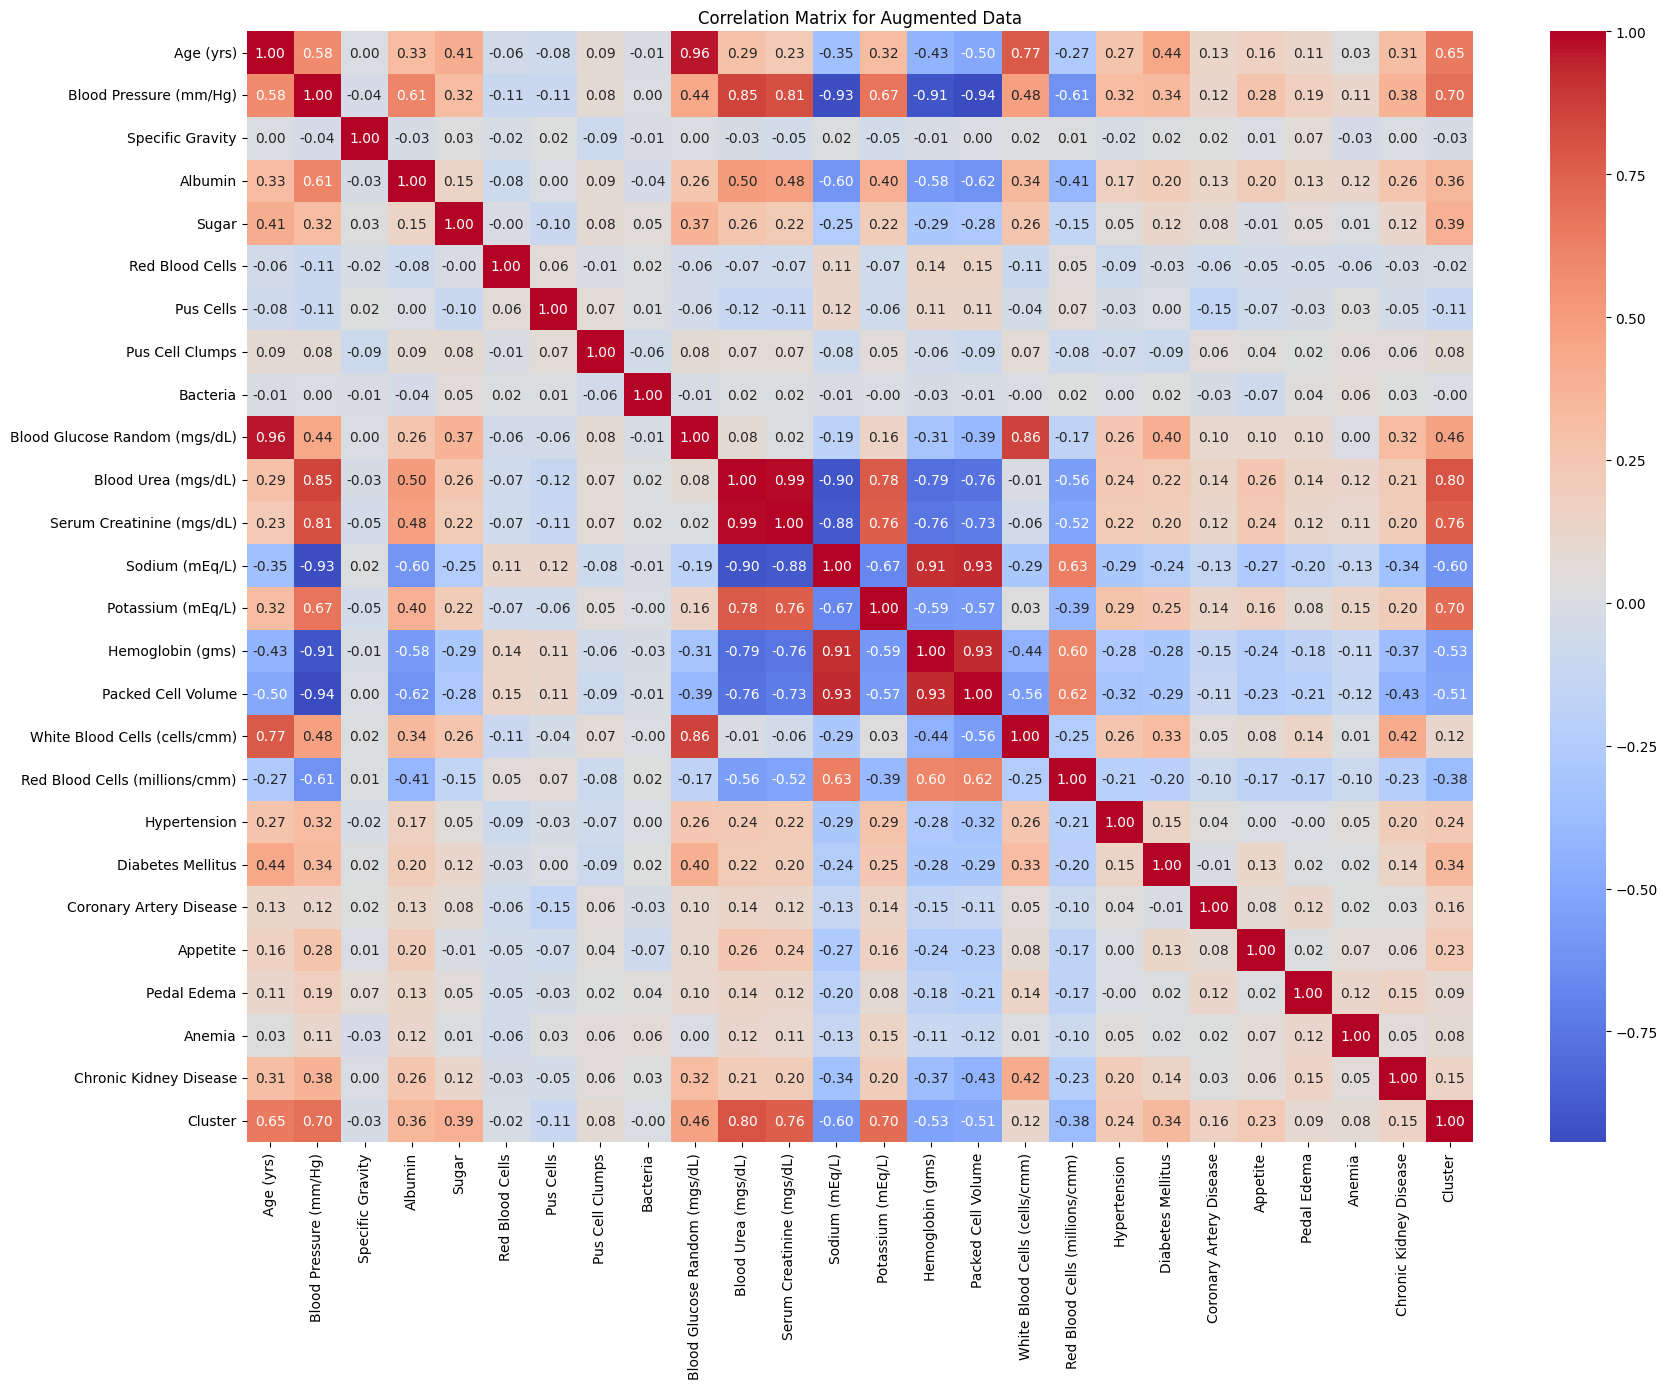

In [507]:
def compare_data(original_data, augmented_data):
    features_to_compare = original_data.columns.tolist()

    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(features_to_compare[:25], 1):  # Limit to first 25 features
        plt.subplot(5, 5, i)
        sns.histplot(original_data[feature], color='blue', label='Original', kde=True, stat="density")
        sns.histplot(augmented_data[feature], color='orange', label='Augmented', kde=True, stat="density")
        plt.title(f'Distribution Comparison for {feature}')
        plt.legend()
    plt.tight_layout()
    plt.show()


    original_corr = original_data.corr()
    augmented_corr = augmented_data.corr()

    plt.figure(figsize=(18, 14))
    sns.heatmap(original_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title('Correlation Matrix for Original Data')

    plt.figure(figsize=(18, 14))
    sns.heatmap(augmented_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title('Correlation Matrix for Augmented Data')
    plt.tight_layout()
    plt.show()

compare_data(data, augmented_data)

In [508]:
combined_data = pd.concat([data, augmented_data])
feature_columns = most_important_features
target_column = 'Chronic Kidney Disease'

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    data[feature_columns], data[target_column], test_size=0.2, random_state=42)

X_train_comb, X_test_comb, y_train_comb, y_test_comb = train_test_split(
    combined_data[feature_columns], combined_data[target_column], test_size=0.2, random_state=42)


In [509]:
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'SVC': SVC(probability=True, random_state=42),
    'KNeighbors': KNeighborsClassifier()
}

def evaluate_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    return accuracy, precision, recall, f1, fpr, tpr, roc_auc

results_orig = {}
for name, clf in classifiers.items():
    results_orig[name] = evaluate_classifier(clf, X_train_orig, X_test_orig, y_train_orig, y_test_orig)

results_comb = {}
for name, clf in classifiers.items():
    results_comb[name] = evaluate_classifier(clf, X_train_comb, X_test_comb, y_train_comb, y_test_comb)

results_df_orig = pd.DataFrame(results_orig, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'FPR', 'TPR', 'AUC']).T
results_df_comb = pd.DataFrame(results_comb, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'FPR', 'TPR', 'AUC']).T

print("Performance on Original Data:")
print(results_df_orig)
print("\nPerformance on Combined Data:")
print(results_df_comb)


Performance on Original Data:
                   Accuracy Precision    Recall  F1 Score  \
RandomForest            1.0       1.0       1.0       1.0   
LogisticRegression     0.95  0.961538  0.961538  0.961538   
SVC                  0.8625       1.0  0.788462   0.88172   
KNeighbors             0.95       1.0  0.923077      0.96   

                                                                  FPR  \
RandomForest        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2142857142857...   
LogisticRegression  [0.0, 0.0, 0.0, 0.03571428571428571, 0.0357142...   
SVC                 [0.0, 0.0, 0.0, 0.03571428571428571, 0.0357142...   
KNeighbors          [0.0, 0.0, 0.0, 0.0, 0.21428571428571427, 0.5,...   

                                                                  TPR  \
RandomForest        [0.0, 0.5384615384615384, 0.6923076923076923, ...   
LogisticRegression  [0.0, 0.019230769230769232, 0.8076923076923077...   
SVC                 [0.0, 0.019230769230769232, 0.8461538461538461...   
KNeigh

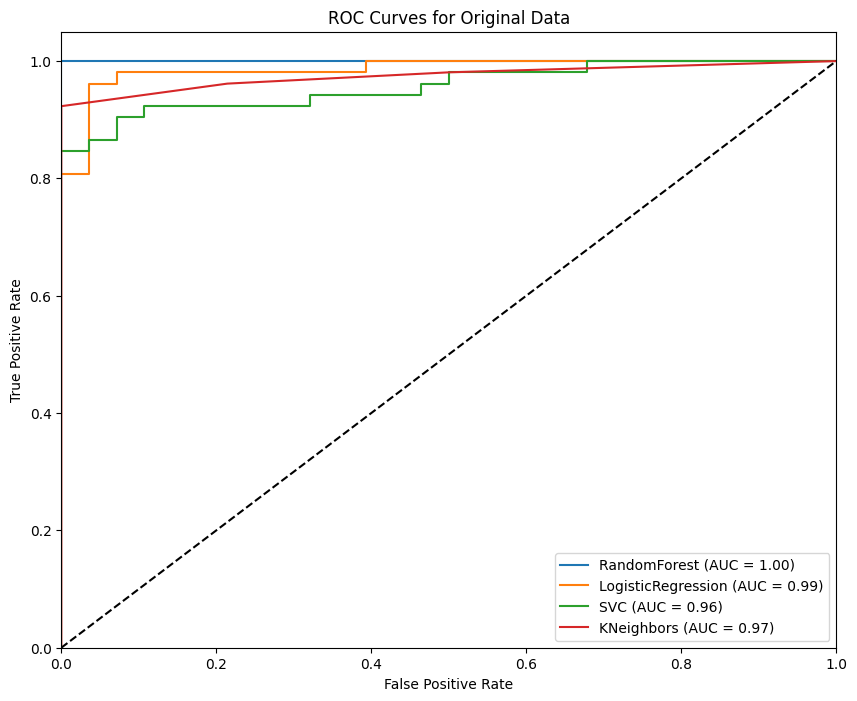

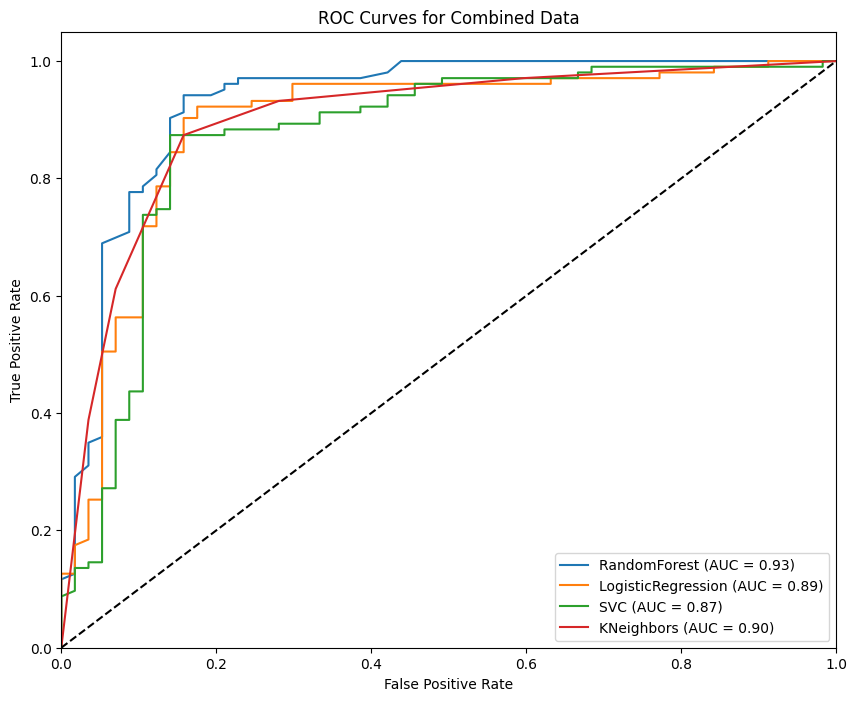

In [510]:
def plot_roc_curves(results, title):
    plt.figure(figsize=(10, 8))
    for name, metrics in results.items():
        fpr, tpr, roc_auc = metrics[4], metrics[5], metrics[6]
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curves(results_orig, 'ROC Curves for Original Data')
plot_roc_curves(results_comb, 'ROC Curves for Combined Data')


### Understanding the Insights:
1. **Quality of Augmented Data**: The lower performance indicates that the augmented data may not be accurately representing the real data distribution.
2. **Feature Importance**: It might suggest that the augmented data lacks certain key features or patterns that are present in the original data. 

### Next Steps to Improve:
1. **Refine Augmentation Techniques**: 
   - Ensure that the methods used for data augmentation closely mimic real-world variations.
   - Consider using more advanced augmentation techniques like GANs (Generative Adversarial Networks) or SMOTE (Synthetic Minority Over-sampling Technique) to generate more realistic synthetic data.

2. **Analyze the Augmented Data**:
   - Perform a detailed analysis of the augmented data to understand where it deviates from the original data.
   - Use visualization tools to compare the distributions of original and augmented data.
3. **Iterative Approach**:
   - Use an iterative approach where you continuously refine and test your data augmentation strategies and model training processes.
